In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os

from FF.image_processing import thresh, prepare_scalemap, edgedetector
from FF.fractal_generation import midpoint_displacement, mountainpro

from fracstack import measure_D, analyze_image
import time

In [2]:
def plot_image(image):
    plt.figure(figsize=(11, 11))
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Removes the axis labels and ticks
    plt.show()


def invert_binary_array(arr):
    if np.unique(arr)[1] == 1:
        return 1-arr
    elif np.unique(arr)[1] == 255:
        return(255-arr)
    else: print("not binary array of 0,1 or 0,255. boohoo ;(")


In [ ]:
iterations = 11
D = 2.3
P = 1
zslice = 0.5

meshmap = midpoint_displacement(iterations, P = P, D=D)
scalemap = prepare_scalemap(meshmap)
threshmap, bwratio = thresh(scalemap, iterations, gaussian_blur=False)

coastline = edgedetector(threshmap).astype(np.uint8)

mountain_slice, mountain_trace = mountainpro(scalemap, iterations, zslice, scale_factor=5)

min_size = 16
n_decades = 1.5
max_size= 10**(np.log10(min_size)+n_decades)
num_sizes=50


version = mountain_trace


D, results_df = analyze_image(input_array = version,
                                                min_size = min_size,
                                                max_size = max_size,
                                                num_sizes = num_sizes,
                                                invert = False,
                                                num_pos = 100,
                                                show_image = True,
                                                pad_factor = 2,
                                                mode ='D0'
                                                )

D, results_df = analyze_image(input_array = version,
                                                min_size = min_size,
                                                max_size = max_size,
                                                num_sizes = num_sizes,
                                                invert = False,
                                                num_pos = 100,
                                                show_image = True,
                                                pad_factor = 2,
                                                mode ='D1'
                                                )
\



In [1]:
from FF.fractal_generation import branching_network as bn
import numpy as np
import matplotlib.pyplot as plt
from fracstack import analyze_image, portfolio_plot


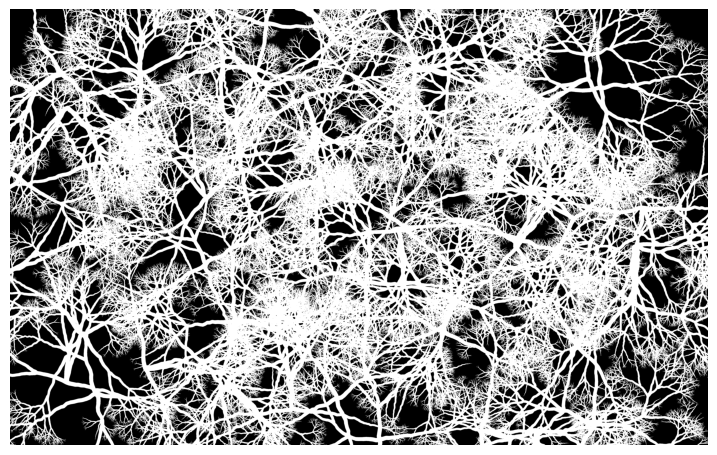

In [82]:
neuron_params = {
    'depth': 13,
    'mean_soma_radius': 1,
    'std_soma_radius': 1,
    'D': 1.5,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'weave_type': 'Gauss',
    'randomness': 0.1,
    'curviness': 'Gauss',
    'curviness_magnitude': 1,
    'n_primary_dendrites': 4,
    'initial_thickness': 50,
    'total_length': 1400
}

network_params = {
    'width': 8096,
    'height': 5060,
    'num_neurons': 50,
    'edge_margin': 0
}

testnet = bn.generate_network(network_id = 'nntest', neuron_params=neuron_params, network_params=network_params)

net_masks = testnet.generate_binary_mask()
net_mask_filled = net_masks['filled']
net_mask_outline = net_masks['outline']


min_size = 16
max_size = min_size*10


plt.figure(figsize=(9,9))
plt.imshow(net_mask_filled, cmap='grey')
plt.axis('off');


#print(measure_D(no_soma, min_size=8, max_size= np.shape(net_mask)[0]/5, n_sizes=20, invert=False, plot_image= True));

In [ ]:
edges = edgedetector(net_mask_filled)
plt.figure(figsize=(11,11))
plt.imshow(edges)
plt.xlim([0, 8096])
plt.ylim([0, 8096])

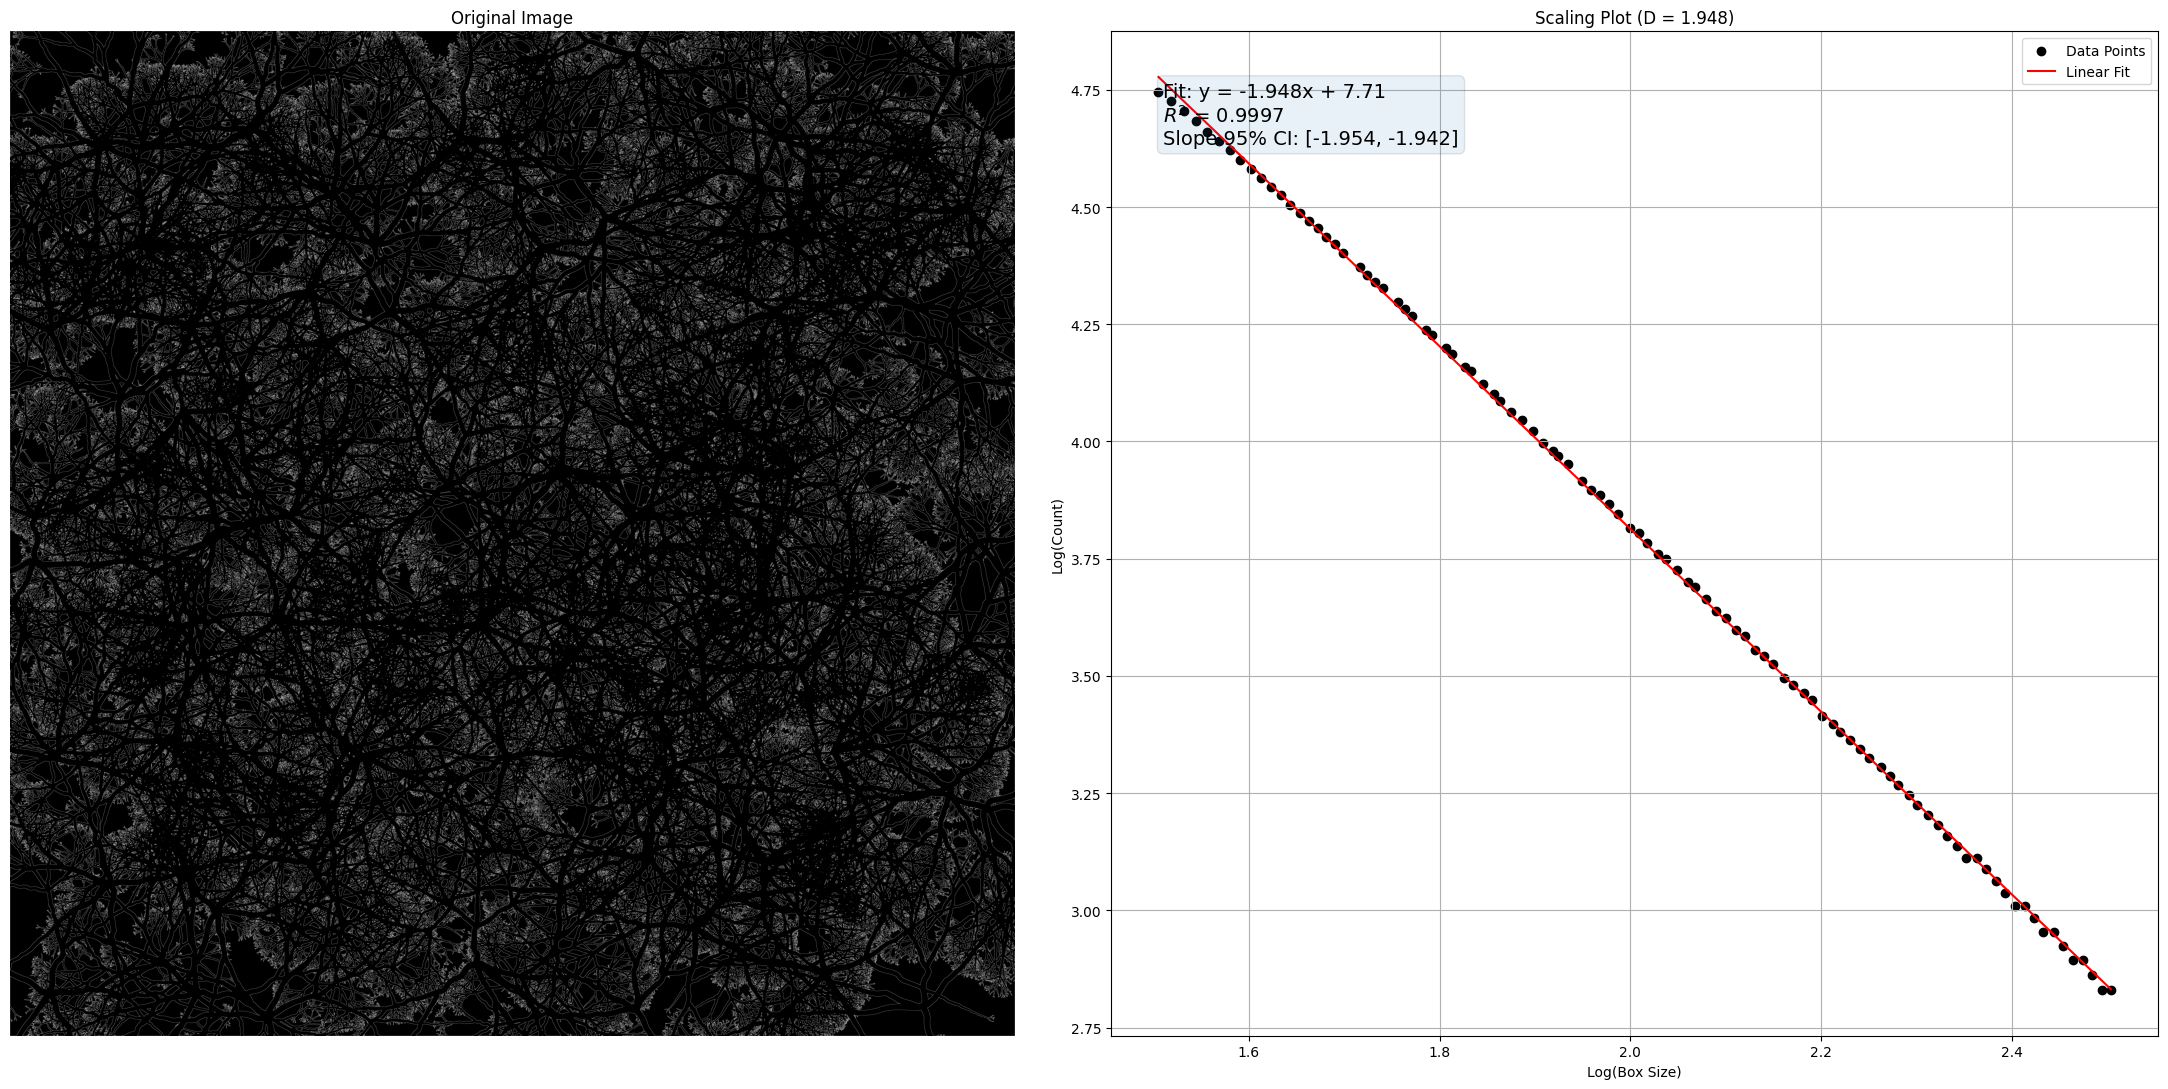

Fractal Dimension (D) = 1.948
Linear Fit Coefficients: Slope = -1.948, Intercept = 7.71
R-squared: 0.9997
Slope 95% Confidence Interval: [-1.954, -1.942]


In [ ]:
d_value, fit, r2, slope_ci, intercept_ci = measureD(
    image_array = edges2,
    threshold=0.5,
    invert=False,
    min_size=32,
    max_size=320,
    num_sizes=100, 
    plot=True,
    animate=False,
    gif_path='boxcount_animation.gif',
    ci_level=0.95
)

# d_value, fit, r2, slope_ci, intercept_ci = measureD(
#     image_array=net_mask_filled,
#     threshold=0.5,
#     invert=False,
#     min_size=16,
#     max_size=160,
#     num_sizes=100, 
#     plot=True,
#     animate=False,
#     gif_path='boxcount_animation.gif',
#     ci_level=0.95
# )

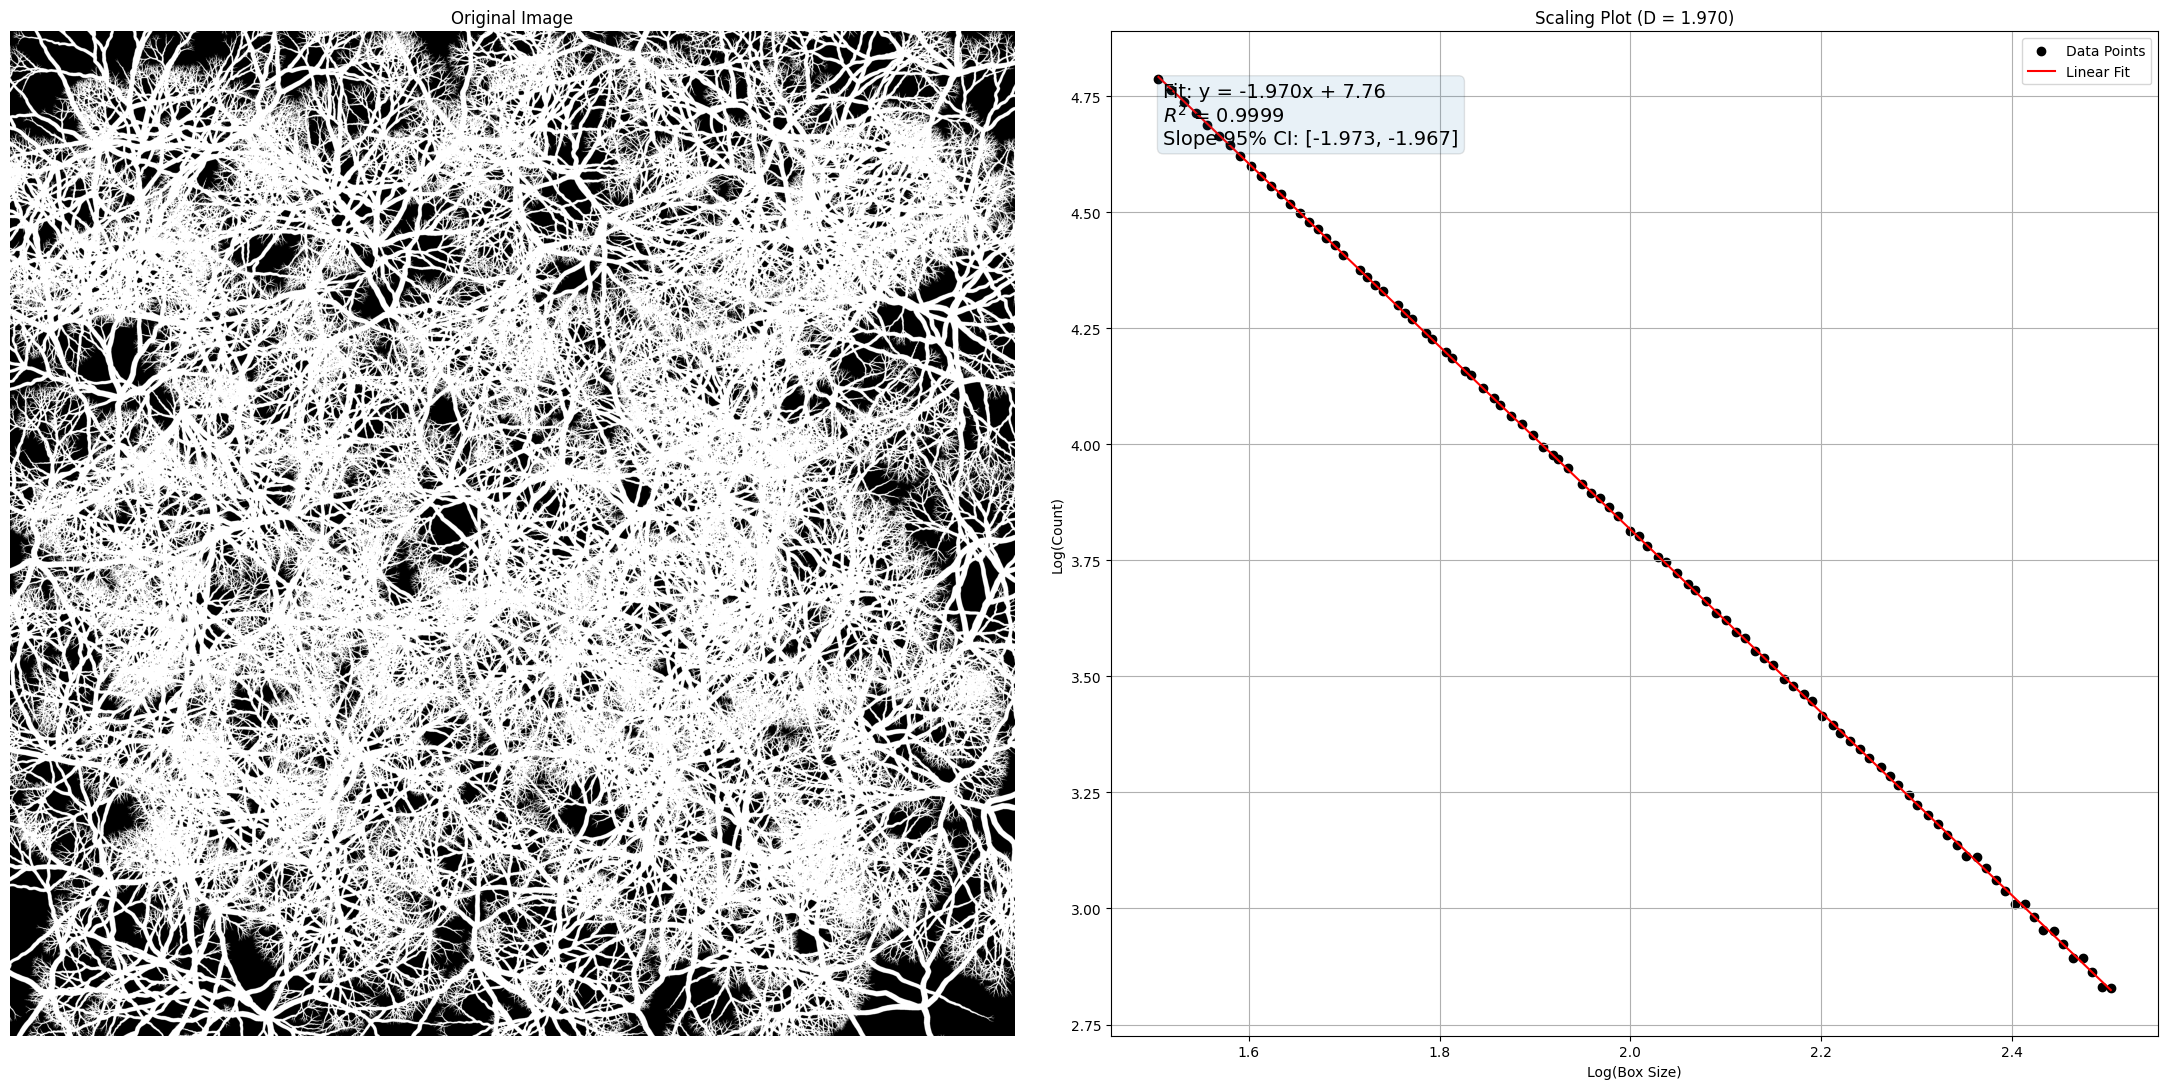

Fractal Dimension (D) = 1.970
Linear Fit Coefficients: Slope = -1.970, Intercept = 7.76
R-squared: 0.9999
Slope 95% Confidence Interval: [-1.973, -1.967]


In [ ]:
d_value, fit, r2, slope_ci, intercept_ci = measureD(
    image_array=net_mask_filled,
    threshold=0.5,
    invert=False,
    min_size=32,
    max_size=320,
    num_sizes=100, 
    plot=True,
    animate=False,
    gif_path='boxcount_animation.gif',
    ci_level=0.95
)

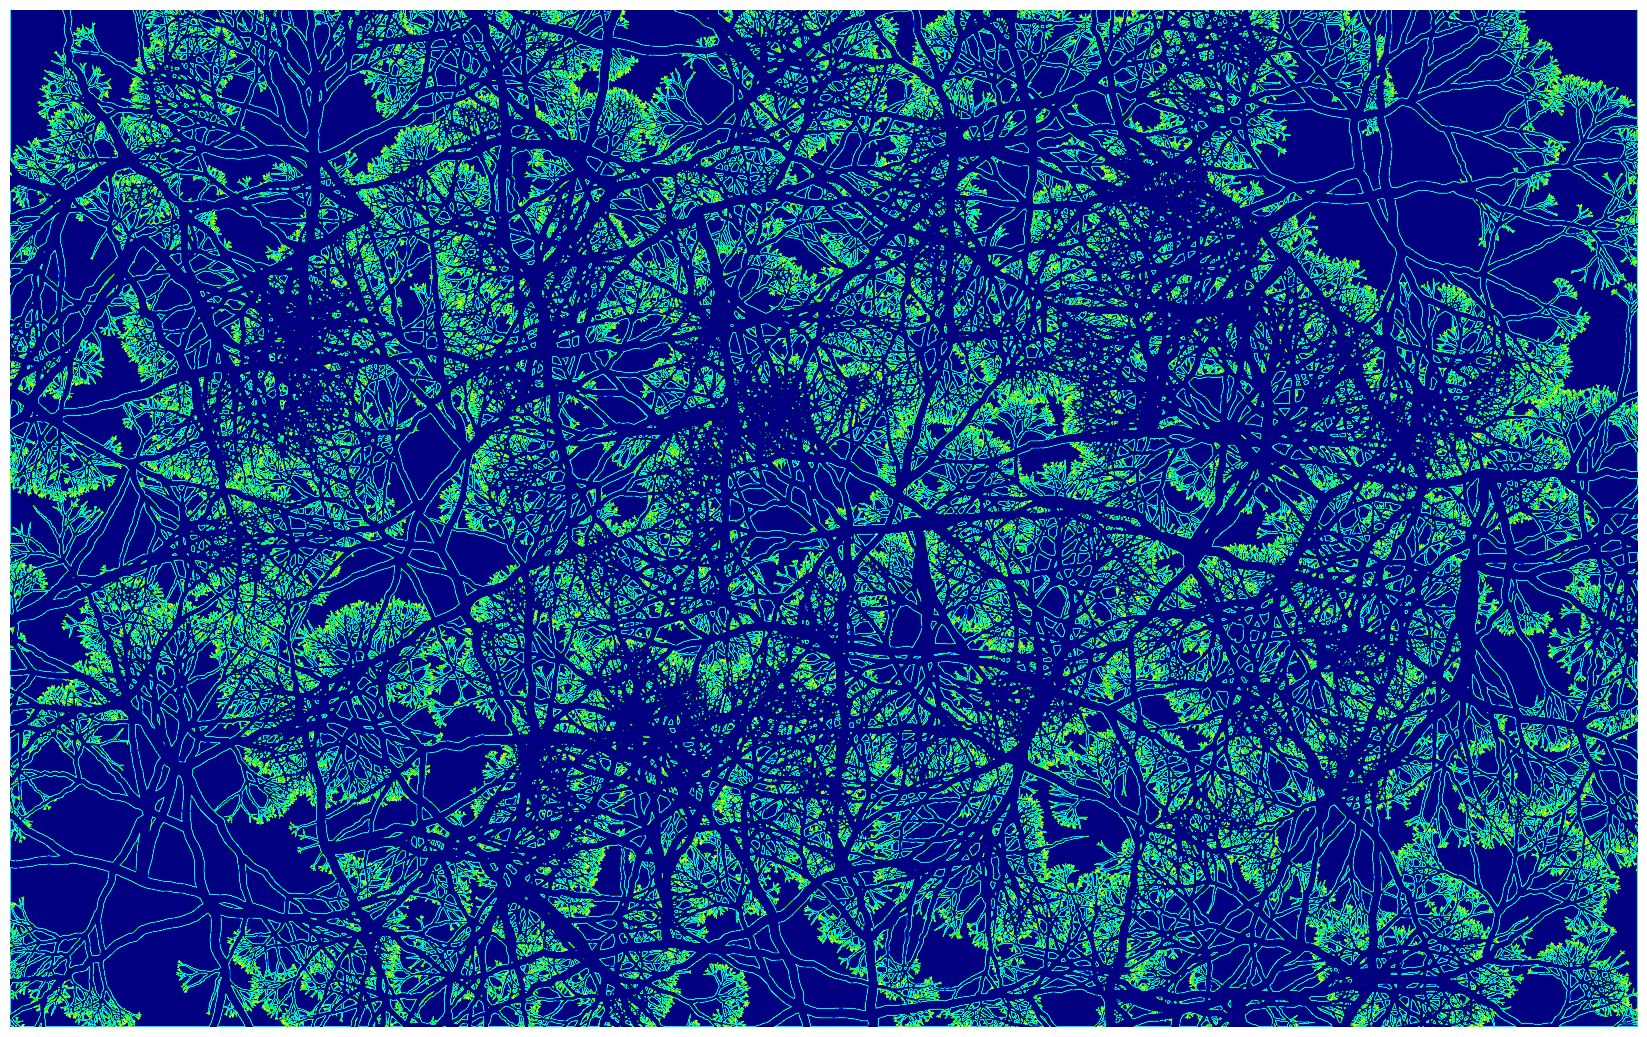

In [105]:
import os
inverted = invert_binary_array(edges2)
plt.figure(figsize=(21,21))
plt.imshow(edges2, cmap='gist_ncar')
# plt.imshow(inverted, cmap='twilight_shifted')
plt.axis(False);

save_path = "/mnt/c/Users/aiden/Desktop"
imname = os.path.join(save_path, 'forcam_bigger.png')
#plt.savefig(imname, bbox_inches = 'tight', pad_inches=0, dpi=227)